In [1]:
%cd ../01_Hash_Functions

/home/bitnami/notebooks/repos/realworld-cryptography-studygroup/code/01_Hash_Functions


# Lesson 1 - Hash Functions

This lesson covers **Hash Functions** in all their primative glory!

### Primary Sources
- Real World Cryptography (2021)          - Ch 0-1 Hash Functions
- Practical Cryptography in Python (2019) - Ch 0-1
   
### Math Concepts

**Combinations vs Permutations [20][20]**

Combination: If you don’t care what order you have things, it’s a combination. Think of combining ingredients, or musical chords: Flour, salt and water in a bowl is the same as salt, water and flour. Lottery tickets, where you pick a few numbers, are a combination. That’s because the order doesn’t matter (but the numbers you select do). You can also have combinations in mathematics, like combinations of functions or linear combinations.

Permutation: If you do care about order, it’s a permutation. Picking winners for a first, second and third place raffle is a permutation, because the order matters. Permutation isn’t a word you use in everyday language. It’s the more complex of the two. Details matters: Eggs first? Then salt? Or flour first?

[20]: https://www.statisticshowto.com/probability-and-statistics/probability-main-index/permutation-combination-formula


**Hexidecimal [21] [22] [23] **

Hexidecimal (also base 16 or simply hex) numeral system is a positional numeral system that represents numbers using a radix (base) of 16. Unlike the decimal system representing numbers using 10 symbols, hexadecimal uses 16 distinct symbols, most often the symbols "0"–"9" to represent values 0 to 9, and "A"–"F" (or alternatively "a"–"f") to represent values from 10 to 15.

Ascii string character is 8 bits. 8 bits = 1 byte. 1 byte = 1 character.

MD5 hash is not a string of characters, but hexdigits. 1 hexdigit (0-15 or 0-F) represents four bits, not eight. 2 hexdigits = 1 byte = 8 bits. MD5 is 32 hexdigits representing a 16 bytes (256 bits).

A hex "character" (nibble) is different from a "character". To be clear on the bits vs byte, vs characters.
* 1 byte is 8 bits (for our purposes)
* 8 bits provides 2**8 possible combinations: 256 combinations
* When you look at a hex character,
 * 16 combinations of [0-9] + [a-f]: the full range of 0,1,2,3,4,5,6,7,8,9,a,b,c,d,e,f
 * 16 is less than 256, so one one hex character does not store a byte.
 * 16 is 2**4: that means one hex character can store 4 bits in a byte (half a byte).
* Therefore, two hex characters, can store 8 bits, 2**8 combinations.

A byte represented as a hex character is [0-9a-f][0-9a-f] and that represents both halfs of a byte (we call a half-byte a nibble).

When you look at a regular single-byte character (multi-byte and wide-characters) it can store far more than 16 combinations.

The capabilities of the character are determined by the encoding. For instance, the ISO 8859-1 that stores an entire byte, stores all this stuff. All that stuff takes the entire 2**8 range.

Summary
* One hex digit = 1 nibble (four-bits)
* Two hex digits = 1 byte (eight-bits)
* MD5 = 32 hex digits
* 32 hex digits = 16 bytes (32 / 2)
* 16 bytes = 128 bits (16 * 8)

[21]: https://en.wikipedia.org/wiki/Hexadecimal
[22]: https://stackoverflow.com/a/41618070 
[23]: https://stackoverflow.com/a/57881578




## Exercise 1) MD5
1. MD5 is ‘insecure/broken’ in what ways? What properties are vunlernable to which types of attacks.
2. Demonstrate one or more attacks of MD5. 
3. When might it still be a valid / usable solution?

It has been proven ([1][1]) feasible to find collisions when using MD5 for cryptographic hashing. According to wikipedia, an theoretical attack against MD5 was also published that breaks MD5's preimage resistance ([2][2]).

See my `EXAMPLE 1` below. proving the md5 vulnerability in Python. 

More examples here: [4][4] [5][5] [6][6]. 

Plus an example breaking MD5 with only a single 64 byte (512 bits) input, with only 2 bit differeing. [7][7]

```
>>> from array import array
>>> from hashlib import md5
>>> input1 = array('I',  [0x6165300e,0x87a79a55,0xf7c60bd0,0x34febd0b,0x6503cf04,
    0x854f709e,0xfb0fc034,0x874c9c65,0x2f94cc40,0x15a12deb,0x5c15f4a3,0x490786bb,
    0x6d658673,0xa4341f7d,0x8fd75920,0xefd18d5a])
>>> input2 = array('I', [x^y for x,y in zip(input1,
    [0, 0, 0, 0, 0, 1<<10, 0, 0, 0, 0, 1<<31, 0, 0, 0, 0, 0])])
>>> input1 == input2
False
>>> md5(input1).hexdigest()
'cee9a457e790cf20d4bdaa6d69f01e41'
>>> md5(input2).hexdigest()
'cee9a457e790cf20d4bdaa6d69f01e41'
```

It could still be used as a checksum function to verify file integrity. But rather not even there, unless dealing with legacy systems. [3][3]

[1]: https://www.mscs.dal.ca/~selinger/md5collision/
[2]: https://en.wikipedia.org/wiki/MD5#Preimage_vulnerability
[3]: https://security.stackexchange.com/questions/34488/using-md5-for-file-integrity-checks
[4]: https://marc-stevens.nl/research/md5-1block-collision/
[5]: https://stackoverflow.com/questions/61440958/how-to-find-a-collision-of-first-56-btis-for-md5md5x-for-input-data-with-the
[6]: https://github.com/thereal1024/python-md5-collision
[7]: http://eprint.iacr.org/2013/170


RWC C01 E03: Breaking MD5 v0.1.0


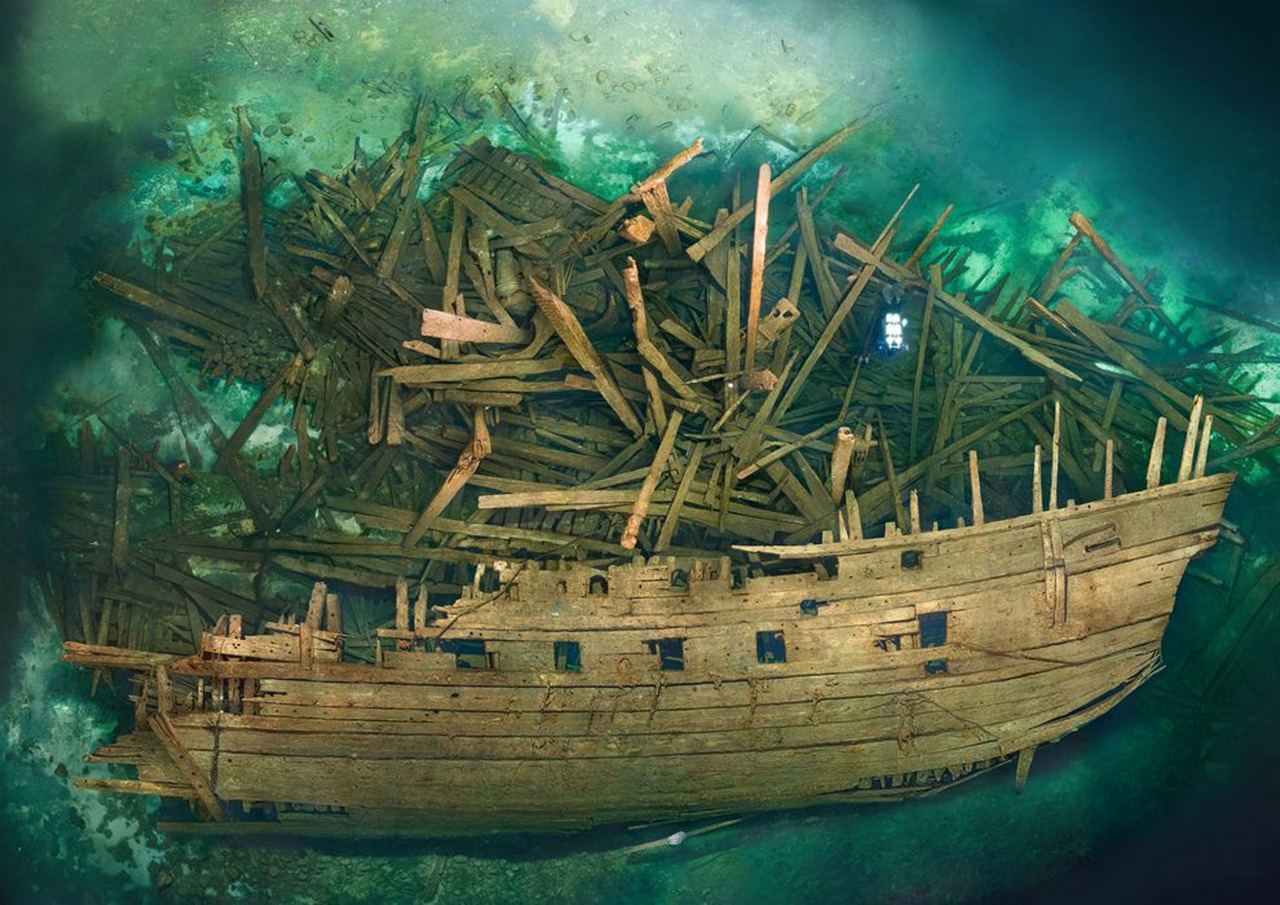

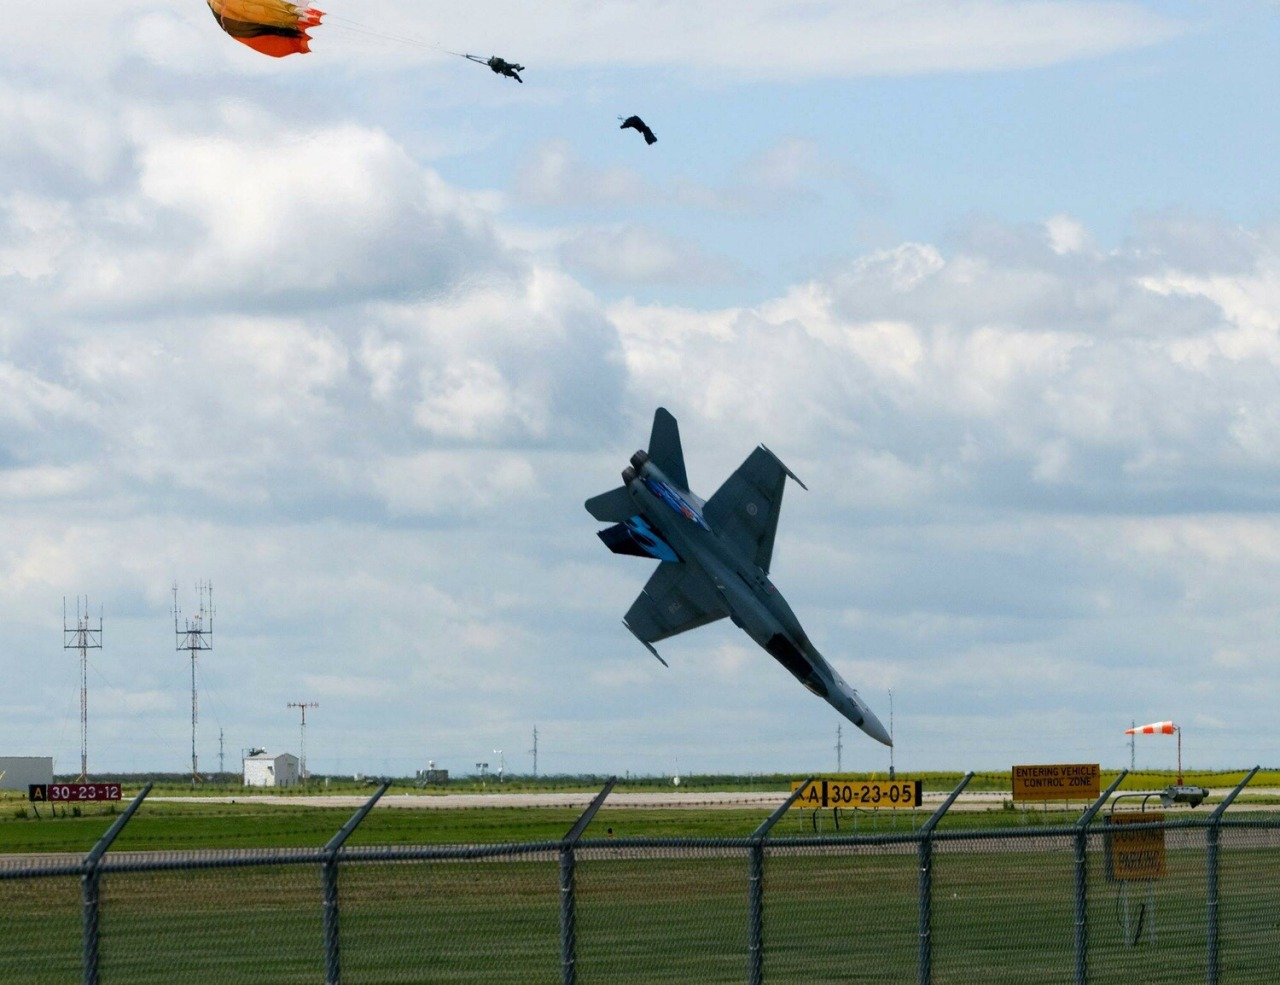


Image File Collision Detection
 OK  sha256

>>> Collision detected! <<< md5:
253dd04e87492e4fc3471de5e776bc3d
-----

Binary File Collision Detection
 OK  sha256

>>> Collision detected! <<< md5:
008ee33a9d58b51cfeb425b0959121c9


In [2]:
import e0101
e0101.main()

### 2) What is the theoretical number of attempts required to brute force a MD5 hash digest?

To brute force a hash, you must attempt ever possible combination of bytes that the hash could be.

MD5 hashes are 128bits or 16 bytes or 32 hex digits, fixed length. (8 bits per byte)

It should take around 2^64 tries to to find collisions

In [3]:
import e0102
e0102.main()

RWC C01 E02: Encoding / Decoding Bytes v0.1.0
ASCII   :  A
Bin     :  1000001  (7 bits)
B16     :  b'41' A
B64     :  b'QQ=='
MD5     :  7fc56270e7a70fa81a5935b72eacbe29
SHA256  :  559aead08264d5795d3909718cdd05abd49572e84fe55590eef31a88a08fdffd


## 3) Find a collision of first 4 bits for MD5(x)

In [4]:
import e0103
e0103.main()

 ... Found one. Stopping
Finished in 0.6276s
Collisions: 1 (max_iter: 33554432)
0 : 7fc5 < 4 >>
7fc56270e7a70fa81a5935b72eacbe29
7fc5adb4dce122e5a7926719a84a34da
